In [51]:
# importing necessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.graph_objs as go
import plotly.express as px
import os

In [52]:
# reading csv
df = pd.read_csv('Top_1000_Highest_Grossing_Movies_Of_All_Time.csv')
df.head() # prints first 5 columns

Movie Title Year of Realease  \
0                                      Avatar             2009   
1                           Avengers: Endgame             2019   
2                                     Titanic             1997   
3  Star Wars: Episode VII - The Force Awakens             2015   
4                      Avengers: Infinity War             2018   

                      Genre  Movie Rating  Duration     Gross  \
0  Action,Adventure,Fantasy           7.8       162  $760.51M   
1    Action,Adventure,Drama           8.4       181  $858.37M   
2             Drama,Romance           7.9       194  $659.33M   
3   Action,Adventure,Sci-Fi           7.8       138  $936.66M   
4   Action,Adventure,Sci-Fi           8.4       149  $678.82M   

  Worldwide LT Gross Metascore      Votes  \
0     $2,847,397,339        83  1,236,962   
1     $2,797,501,328        78  1,108,641   
2     $2,201,647,264        75  1,162,142   
3     $2,069,521,700        80    925,551   
4     $2,048,359,754        68  1,062,517   

                                             Logline  
0  A paraplegic Marine dispatched to the moon Pan...  
1  After the devastating events of Avengers: Infi...  
2  A seventeen-year-old aristocrat falls in love ...  
3  As a new threat to the galaxy rises, Rey, a de...  
4  The Avengers and their allies must be willing ...

In [53]:
# shape attribute
df.shape

(1000, 10)

In [54]:
df.info()  # gives info of each column

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 10 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   Movie Title         1000 non-null   object 
 1   Year of Realease    1000 non-null   object 
 2   Genre               1000 non-null   object 
 3   Movie Rating        1000 non-null   float64
 4   Duration            1000 non-null   int64  
 5   Gross               1000 non-null   object 
 6   Worldwide LT Gross  1000 non-null   object 
 7   Metascore           1000 non-null   object 
 8   Votes               1000 non-null   object 
 9   Logline             1000 non-null   object 
dtypes: float64(1), int64(1), object(8)
memory usage: 78.2+ KB


In [55]:
df.describe() # gives statistical insights

Movie Rating     Duration
count    1000.00000  1000.000000
mean        6.80080   117.679000
std         0.90145    21.561885
min         2.50000    69.000000
25%         6.20000   102.000000
50%         6.80000   116.000000
75%         7.40000   130.000000
max         9.20000   238.000000

In [56]:
df.isnull().sum()  # to check null values

Movie Title           0
Year of Realease      0
Genre                 0
Movie Rating          0
Duration              0
Gross                 0
Worldwide LT Gross    0
Metascore             0
Votes                 0
Logline               0
dtype: int64

In [57]:
# cleaning the data
cleaning_list = ['Year of Realease', 'Gross', 'Worldwide LT Gross', 'Metascore', 'Votes']
for i in cleaning_list:
    df[i] = df[i].replace(r"[$|M|******|,|X]", "",regex=True)
    df[i] = pd.to_numeric(df[i])

In [58]:
df.head()

Movie Title  Year of Realease  \
0                                      Avatar              2009   
1                           Avengers: Endgame              2019   
2                                     Titanic              1997   
3  Star Wars: Episode VII - The Force Awakens              2015   
4                      Avengers: Infinity War              2018   

                      Genre  Movie Rating  Duration   Gross  \
0  Action,Adventure,Fantasy           7.8       162  760.51   
1    Action,Adventure,Drama           8.4       181  858.37   
2             Drama,Romance           7.9       194  659.33   
3   Action,Adventure,Sci-Fi           7.8       138  936.66   
4   Action,Adventure,Sci-Fi           8.4       149  678.82   

   Worldwide LT Gross  Metascore    Votes  \
0          2847397339       83.0  1236962   
1          2797501328       78.0  1108641   
2          2201647264       75.0  1162142   
3          2069521700       80.0   925551   
4          2048359754       68.0  1062517   

                                             Logline  
0  A paraplegic Marine dispatched to the moon Pan...  
1  After the devastating events of Avengers: Infi...  
2  A seventeen-year-old aristocrat falls in love ...  
3  As a new threat to the galaxy rises, Rey, a de...  
4  The Avengers and their allies must be willing ...

In [59]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 10 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   Movie Title         1000 non-null   object 
 1   Year of Realease    1000 non-null   int64  
 2   Genre               1000 non-null   object 
 3   Movie Rating        1000 non-null   float64
 4   Duration            1000 non-null   int64  
 5   Gross               966 non-null    float64
 6   Worldwide LT Gross  1000 non-null   int64  
 7   Metascore           964 non-null    float64
 8   Votes               1000 non-null   int64  
 9   Logline             1000 non-null   object 
dtypes: float64(3), int64(4), object(3)
memory usage: 78.2+ KB


In [60]:
df.describe()

Year of Realease  Movie Rating     Duration       Gross  \
count       1000.000000    1000.00000  1000.000000  966.000000   
mean        2007.611000       6.80080   117.679000  156.158975   
std           10.398067       0.90145    21.561885  110.629617   
min         1937.000000       2.50000    69.000000    0.010000   
25%         2002.000000       6.20000   102.000000   90.832500   
50%         2010.000000       6.80000   116.000000  129.245000   
75%         2016.000000       7.40000   130.000000  187.090000   
max         2022.000000       9.20000   238.000000  936.660000   

       Worldwide LT Gross   Metascore         Votes  
count        1.000000e+03  964.000000  1.000000e+03  
mean         4.105976e+08   59.644191  3.393784e+05  
std          2.951927e+08   15.946919  3.231349e+05  
min          1.766002e+08   12.000000  3.960000e+02  
25%          2.220363e+08   48.000000  1.347940e+05  
50%          3.084121e+08   59.000000  2.448125e+05  
75%          4.733442e+08   71.000000  4.410002e+05  
max          2.847397e+09  100.000000  2.622926e+06

In [61]:
df.isnull().sum()

Movie Title            0
Year of Realease       0
Genre                  0
Movie Rating           0
Duration               0
Gross                 34
Worldwide LT Gross     0
Metascore             36
Votes                  0
Logline                0
dtype: int64

In [62]:
# null values after cleaning the data i.e; after changing data type
df[df['Metascore'].isnull()][['Gross','Metascore']]

Gross  Metascore
65    0.34        NaN
89     NaN        NaN
138    NaN        NaN
159    NaN        NaN
184   1.54        NaN
271   2.36        NaN
301    NaN        NaN
304   0.71        NaN
380    NaN        NaN
448    NaN        NaN
461    NaN        NaN
500   0.84        NaN
511  12.39        NaN
623   1.30        NaN
625    NaN        NaN
631  20.19        NaN
664   0.29        NaN
665   1.48        NaN
682   0.21        NaN
721   1.29        NaN
750   0.18        NaN
767    NaN        NaN
776    NaN        NaN
812    NaN        NaN
817    NaN        NaN
866    NaN        NaN
877    NaN        NaN
897   0.71        NaN
911   0.61        NaN
913   0.77        NaN
916    NaN        NaN
925    NaN        NaN
943    NaN        NaN
951   0.71        NaN
954    NaN        NaN
957   0.15        NaN

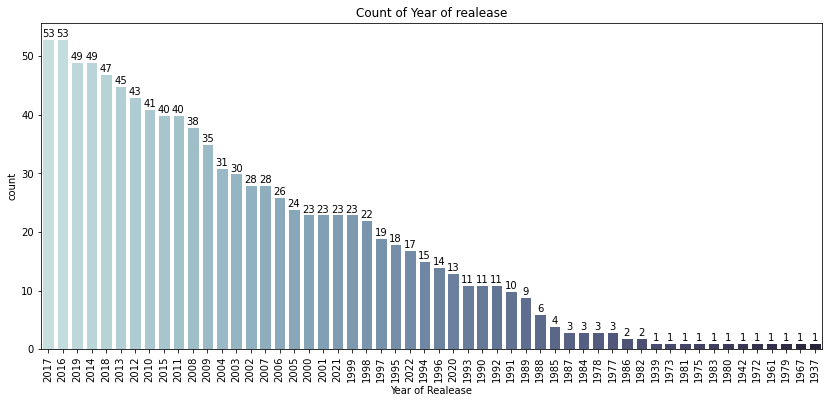

In [63]:
# Count Plot Graphic
# defining function to plot grapgh
def count_plot(data,data_desc): 
    plt.figure(figsize=(14,6))
    ax = sns.countplot(x=data, palette= "ch:start=.2,rot=-.3", edgecolor='white', linewidth=1, order=data.value_counts().index)
    plt.xticks(rotation=90) 
    plt.title(data_desc)
    for c in ax.containers:
        ax.bar_label(c, fmt='%.0f', label_type='edge')
    
# count plot for year of release
count_plot(df['Year of Realease'],'Count of Year of realease')

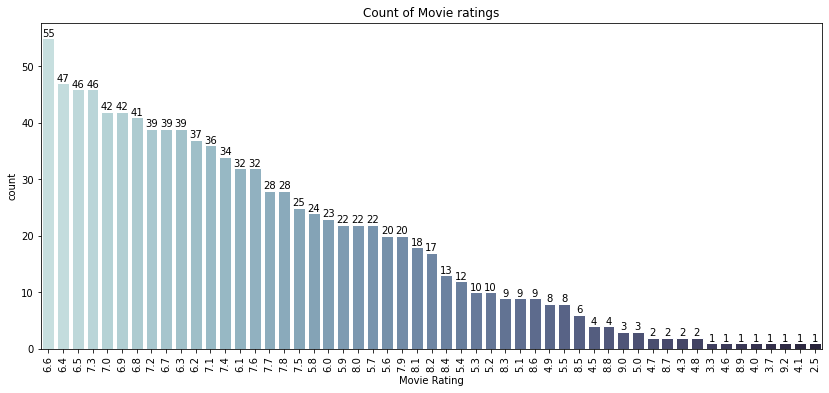

In [64]:
# count plot for movie rating
count_plot(df['Movie Rating'],'Count of Movie ratings')

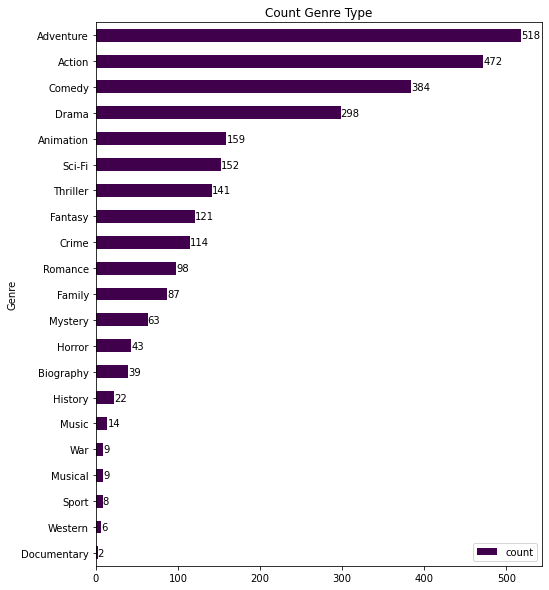

In [65]:
# Genre columns get dummies
gd_df_x = df['Genre'].str.get_dummies(sep=',')

# Genre columns
df_x = pd.DataFrame(gd_df_x.sum(),columns=['count'])
df_x.sort_values(by = 'count',ascending = True,inplace = True)

# plotting horizontal bar graph
ax = df_x.plot(kind='barh',cmap='PRGn',figsize=(8,10),title='Count Genre Type')
plt.legend(loc='lower right') # changing legend location
plt.ylabel('Genre')
for c in ax.containers:
    ax.bar_label(c,fmt='%.0f',label_type='edge')

In [66]:
# defining function to plot top 10 of individeal data
def top_10_vis(data, title):
    top_10_gross = df[['Movie Title',data]][0:10]
    top_10_gross.sort_values(by=data, inplace=True)
    ax   = top_10_gross.plot(kind='barh',color='salmon', figsize=(9,8) , title= title)
    ax.set_yticklabels(list(top_10_gross['Movie Title']), minor=False)
    plt.ylabel('The name of the movie' ,fontsize=16)
    plt.xlabel(data ,fontsize=16)
    ax.xaxis.grid(color='gray', linestyle='dashed')
    ax.yaxis.set_tick_params(labelsize='large')

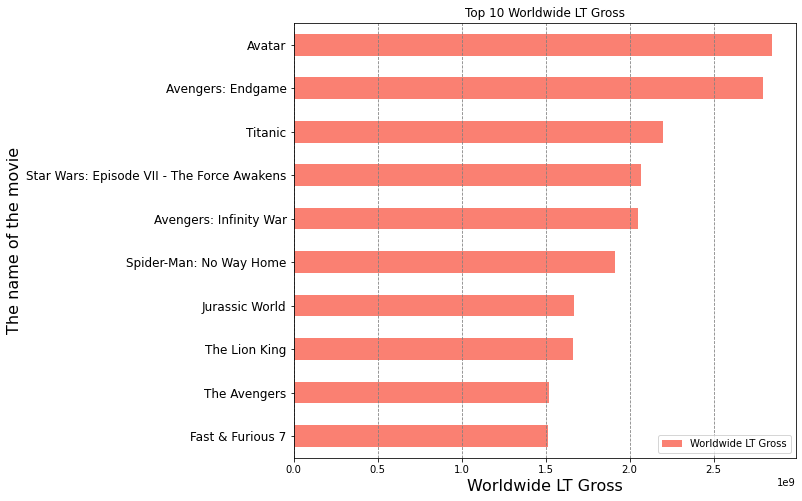

In [67]:
# plotting Top 10 Worldwide LT Gross
top_10_vis('Worldwide LT Gross','Top 10 Worldwide LT Gross' )

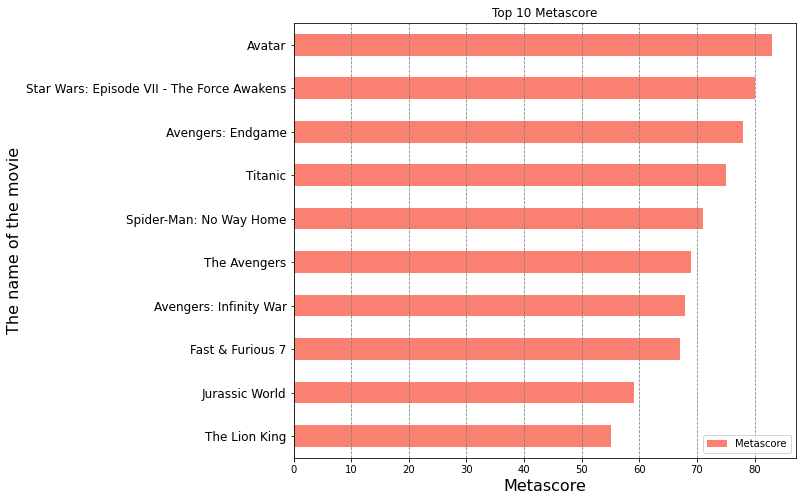

In [68]:
# plotting Top 10 Metascore
top_10_vis('Metascore','Top 10 Metascore')

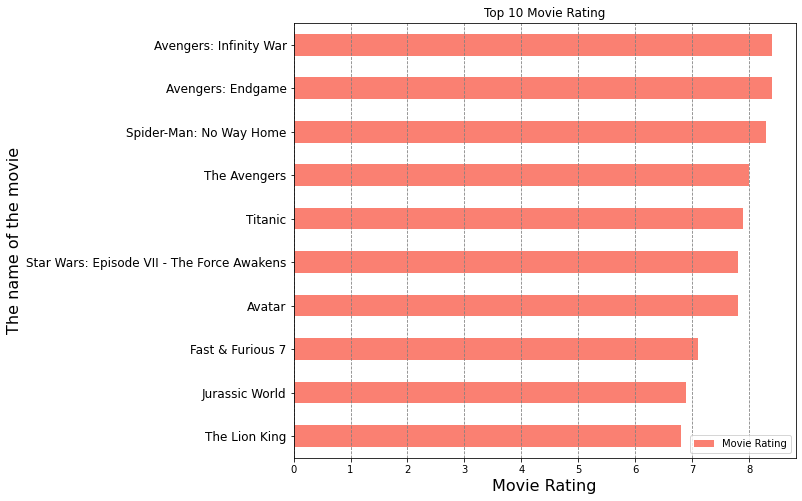

In [69]:
# plotting Top 10 Movie Rating
top_10_vis('Movie Rating','Top 10 Movie Rating' )

In [34]:
# function to format Worlwide LT Gross into readable number
def number_ord(num):
    num = float("{:.3g}".format(num))
    magnitude = 0
    while abs(num) >= 1000:
        magnitude += 1
        num /= 1000.0
    result = "{}{}".format("{:f}".format(num).rstrip("0").rstrip('.'), ["", "K", "M", "B", "T"][magnitude])
    return result

In [72]:
# grouping all the genre to create a new dataframe
gen_df = df[['Genre','Worldwide LT Gross']]
gen_df = gen_df.dropna(how = 'any', axis = 0)  # dropping null values if any
gen_df['Genre'] = gen_df['Genre'].str.split(',')
gen_df = gen_df.explode('Genre')
gen_df = gen_df.groupby(['Genre']).median().sort_values(by = 'Worldwide LT Gross',ascending=False)

gen_df['Label'] = gen_df['Worldwide LT Gross'].apply(lambda x:"$" + number_ord(x))
# gen_df.reset_index(inplace=True)
gen_df

Worldwide LT Gross  Label
Genre                                 
Fantasy             403449830.0  $403M
Musical             396271103.0  $396M
Sci-Fi              392002999.5  $392M
Adventure           386320872.5  $386M
Animation           373515621.0  $374M
Action              352475309.5  $352M
Family              299820798.0  $300M
Thriller            293503354.0  $294M
History             282305622.0  $282M
Comedy              275688326.0  $276M
Drama               264622559.5  $265M
Mystery             256697520.0  $257M
Western             256389521.0  $256M
Music               252029333.0  $252M
Horror              246999039.0  $247M
Crime               242492263.5  $242M
Romance             241994073.0  $242M
Documentary         241815235.0  $242M
Sport               236313379.0  $236M
Biography           233555708.0  $234M
War                 231976425.0  $232M

In [73]:
# plotting bar graph with reference to genre
fig = px.bar(gen_df,width=700,height=700,x='Worldwide LT Gross',y=gen_df.index,title='Movie Genre vs. Worldwide LT Gross',text='Label',color=gen_df.index)
fig.show()

In [74]:
gen_df1 = df[['Genre', "Worldwide LT Gross", 'Movie Rating','Metascore', 'Duration']]
gen_df1 = gen_df1.dropna(how='any',axis=0)
gen_df1['Genre'] = gen_df1['Genre'].str.split(',')
gen_df1 = gen_df1.explode('Genre')
gen_df1

Genre  Worldwide LT Gross  Movie Rating  Metascore  Duration
0       Action          2847397339           7.8       83.0       162
0    Adventure          2847397339           7.8       83.0       162
0      Fantasy          2847397339           7.8       83.0       162
1       Action          2797501328           8.4       78.0       181
1    Adventure          2797501328           8.4       78.0       181
..         ...                 ...           ...        ...       ...
998     Comedy           176885658           6.7       61.0       103
998      Crime           176885658           6.7       61.0       103
999     Action           176600207           6.9       47.0       118
999     Comedy           176600207           6.9       47.0       118
999      Crime           176600207           6.9       47.0       118

[2677 rows x 5 columns]

Text(0.5, 1.0, 'Movie rating vs Wrldwide LT Gross vs Metascore')

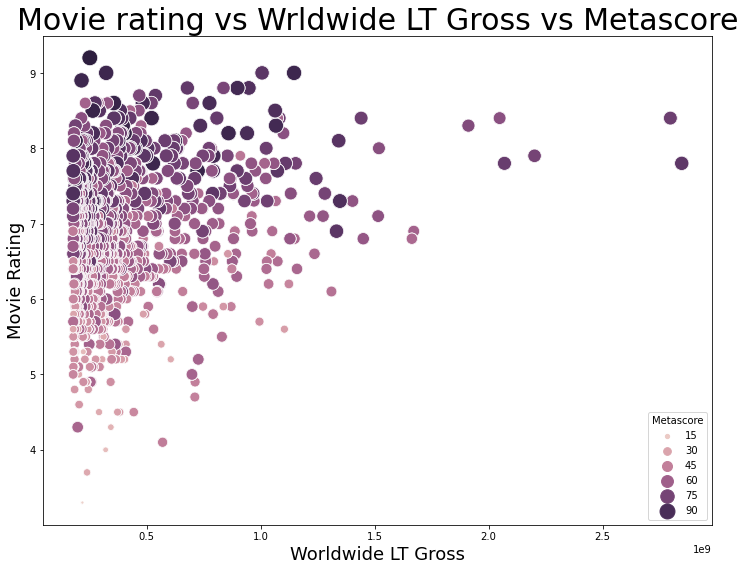

In [399]:
# plotting data
plt.figure(figsize=(12,9))
sns.scatterplot(data=gen_df1,x='Worldwide LT Gross',y='Movie Rating',hue='Metascore',
               size='Metascore',sizes=(10,250))
plt.xlabel('Worldwide LT Gross',size=18)
plt.ylabel('Movie Rating',size=18)
plt.title('Movie rating vs Wrldwide LT Gross vs Metascore',fontsize=30)

In [75]:
# function for box plot
def genre_box_plor(x,xlabel,title):
    plt.figure(figsize=(12,10))
    sns.boxplot(data=gen_df1, x=x, y='Genre', palette='viridis')
    plt.title(title,fontsize=16)
    plt.xlabel(xlabel,size=18)
    plt.ylabel('Movie Genre',size=18)
    sns.despine(left=True)

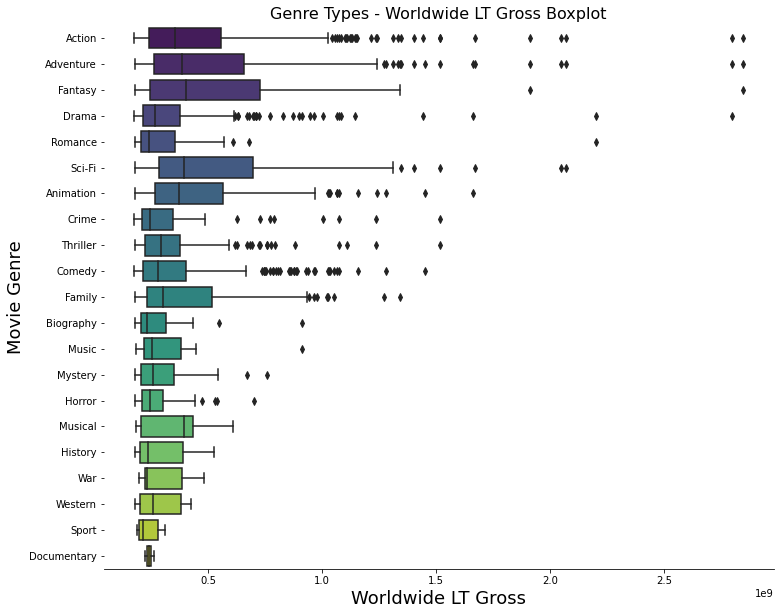

In [76]:
# passing in required arguments for plotting Worldwide LT Gross 
genre_box_plor('Worldwide LT Gross', "Worldwide LT Gross", 'Genre Types - Worldwide LT Gross Boxplot' )

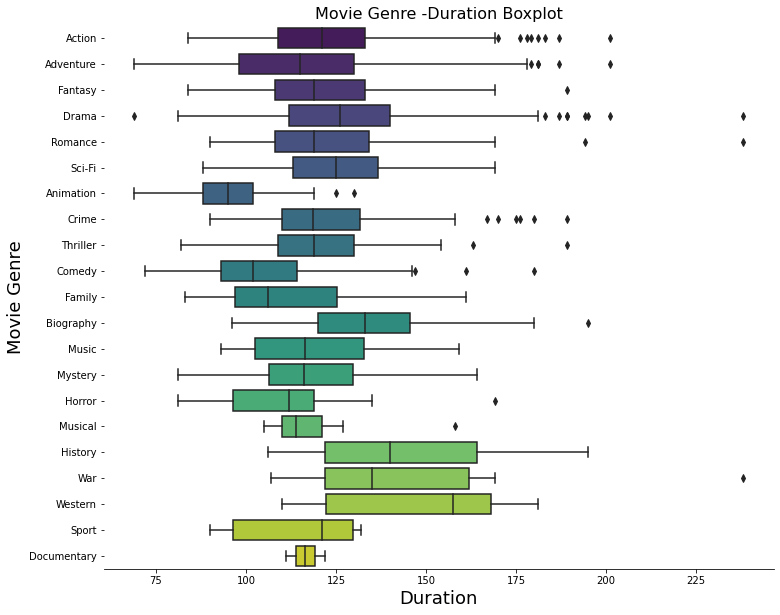

In [77]:
# passing in required arguments for plotting Duration
genre_box_plor('Duration', "Duration", 'Movie Genre -Duration Boxplot' )

In [78]:
# function for plotting lineplot
def line_plot(data, title ,xlabel, ylabel):
    plt.figure(figsize=(10, 6))
    sns.lineplot(data=data , palette="rocket_r", linewidth=4.0)
    plt.title(title, fontsize=16)
    plt.ylabel(ylabel, size=16)
    plt.xlabel(xlabel, size=18)

In [79]:
# grouping by Year and adding worlwide gross
df_year = df.groupby(['Year of Realease'])[['Worldwide LT Gross']].sum()
df_year

Worldwide LT Gross
Year of Realease                    
1937                       184925486
1939                       402382193
1942                       267447150
1961                       215880014
1967                       205843612
1972                       250341816
1973                       441306145
1975                       474141300
1977                      1319400305
1978                       884633559
1979                       210308099
1980                       538375067
1981                       389925971
1982                       970110825
1983                       475106177
1984                       946046546
1985                      1211725115
1986                       685491684
1987                       834687971
1988                      1618617903
1989                      2628417353
1990                      3442288401
1991                      2849270275
1992                      3267522486
1993                      3830755669
1994                      5095008667
1995                      4893545134
1996                      4679391660
1997                      7519866383
1998                      6296631925
1999                      7922577100
2000                      6705240355
2001                      8706898410
2002                      9903380968
2003                     10232304111
2004                     11067298825
2005                      9123022748
2006                      9772555615
2007                     11818371590
2008                     13856397642
2009                     16356713264
2010                     16459543453
2011                     16684714685
2012                     19544476670
2013                     19527268286
2014                     20689737551
2015                     21124910823
2016                     23299052191
2017                     25374759515
2018                     24674882299
2019                     26358731580
2020                      4074135076
2021                     11083822938
2022                      9207418602

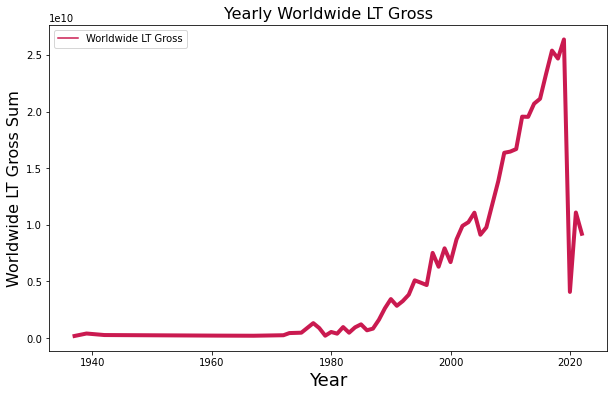

In [80]:
line_plot(df_year,'Yearly Worldwide LT Gross','Year', "Worldwide LT Gross Sum")

In [81]:
# grouping by year and taking median of movie ratings
df_year_rating = df.groupby(['Year of Realease'])[['Movie Rating']].median()
df_year_rating

Movie Rating
Year of Realease              
1937                      7.60
1939                      8.20
1942                      7.30
1961                      7.30
1967                      7.60
1972                      9.20
1973                      8.10
1975                      8.10
1977                      7.60
1978                      7.20
1979                      6.20
1980                      8.70
1981                      8.40
1982                      7.65
1983                      8.30
1984                      7.50
1985                      6.95
1986                      6.75
1987                      6.90
1988                      6.60
1989                      7.50
1990                      7.10
1991                      7.10
1992                      7.00
1993                      7.10
1994                      7.10
1995                      6.95
1996                      6.85
1997                      6.90
1998                      6.80
1999                      6.60
2000                      6.50
2001                      6.90
2002                      7.15
2003                      6.50
2004                      6.80
2005                      6.90
2006                      6.75
2007                      6.60
2008                      6.60
2009                      6.70
2010                      6.40
2011                      6.90
2012                      6.80
2013                      7.00
2014                      6.60
2015                      6.60
2016                      6.70
2017                      6.70
2018                      6.70
2019                      6.80
2020                      6.60
2021                      6.60
2022                      6.50

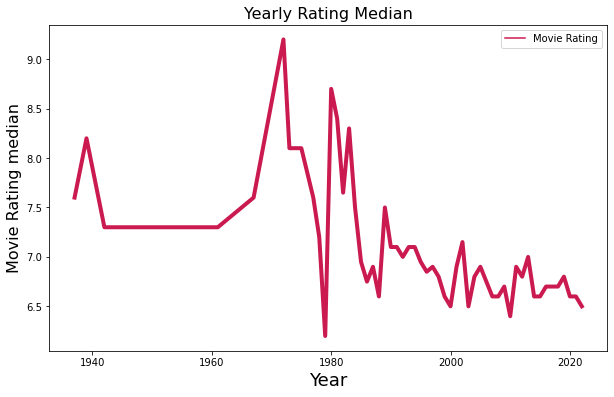

In [82]:
line_plot(df_year_rating,'Yearly Rating Median', 'Year', "Movie Rating median")

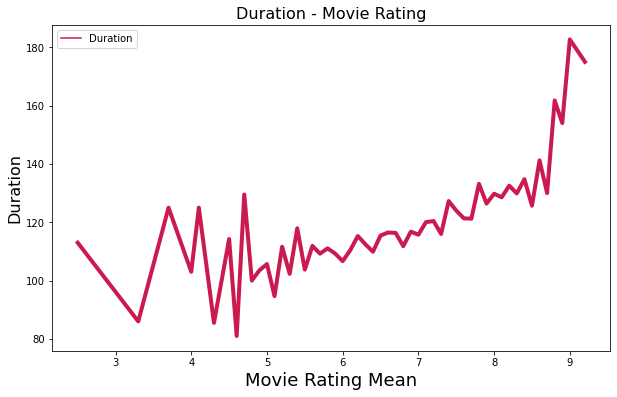

In [83]:
# grouping by movie ratings and taking mean of duration
df_duration = df.groupby(['Movie Rating'])[['Duration']].mean()
line_plot(df_duration,'Duration - Movie Rating',  "Movie Rating Mean",'Duration')

Text(0, 0.5, 'The name of the movie')

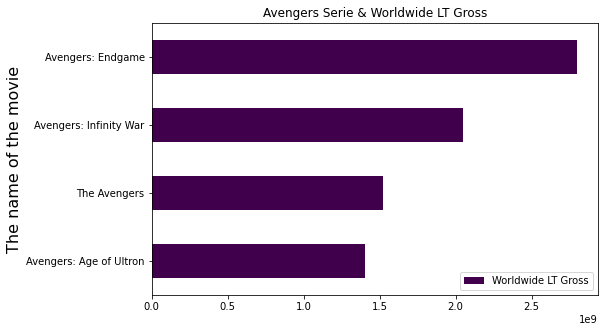

In [84]:
# Avengers Serie & Worldwide LT Gross
df_x = df[df['Movie Title'].str.contains('Avengers',na=False)].sort_values("Worldwide LT Gross", ascending=True)
df_x = df_x[['Movie Title',"Worldwide LT Gross"]]
df_x.set_index('Movie Title',inplace=True)
ax   = df_x.plot(kind='barh', cmap='PRGn' , figsize=(8,5) ,title= 'Avengers Serie & Worldwide LT Gross')
plt.ylabel('The name of the movie' ,fontsize=16)

<AxesSubplot:>

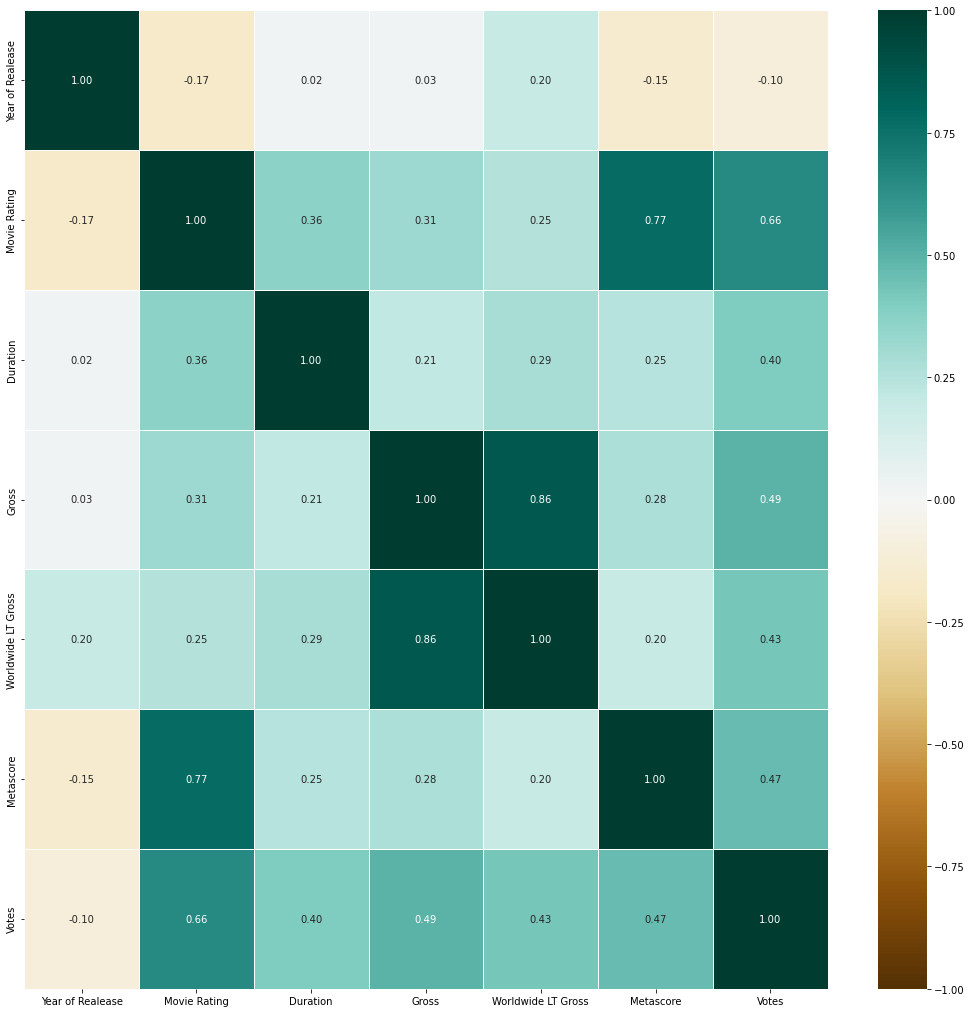

In [87]:
fig, ax = plt.subplots(figsize=(18,18))
corr1   = df.corr()
sns.heatmap(corr1, ax=ax, annot=True, cmap='BrBG', fmt=".2f", linewidths=.5, vmin=-1, vmax=1)

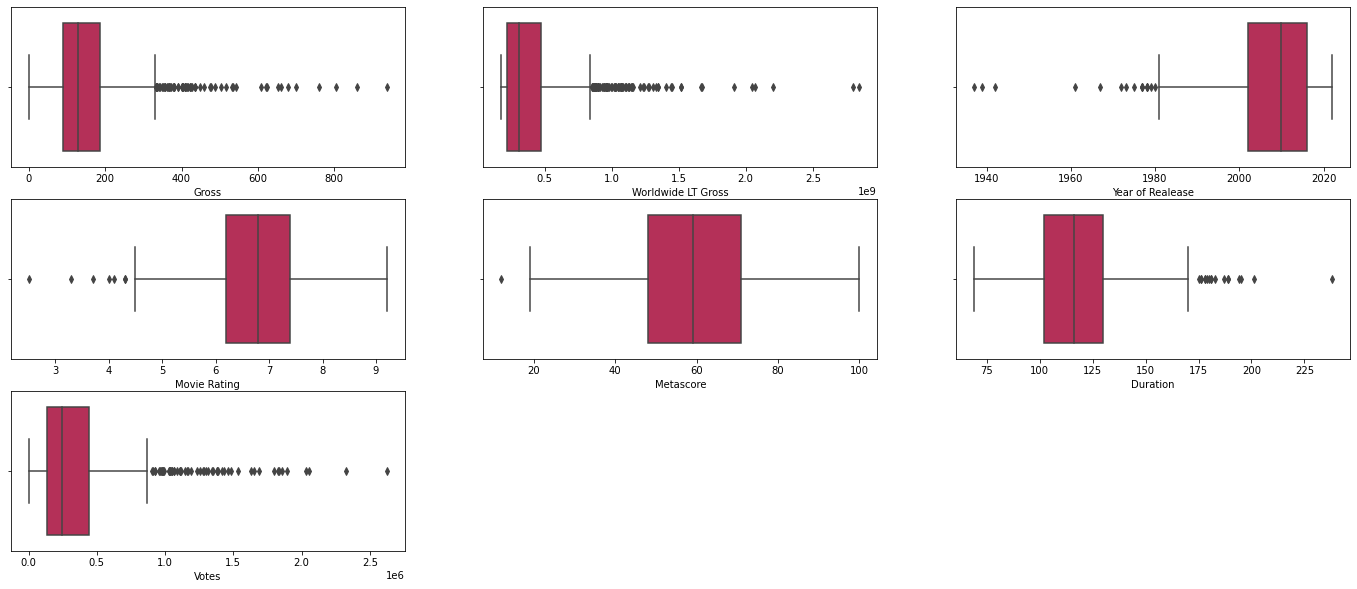

In [93]:
# outlier detection using boxplot
df_box_plot=df[['Gross', 'Worldwide LT Gross', 'Year of Realease','Movie Rating', 'Metascore','Duration','Votes']]

i = 1
plt.figure(figsize=(24, 10))
for feature in df_box_plot.columns:
    plt.subplot(3, 3, i)
    sns.boxplot(x=df_box_plot[feature], palette="rocket_r")
    i += 1

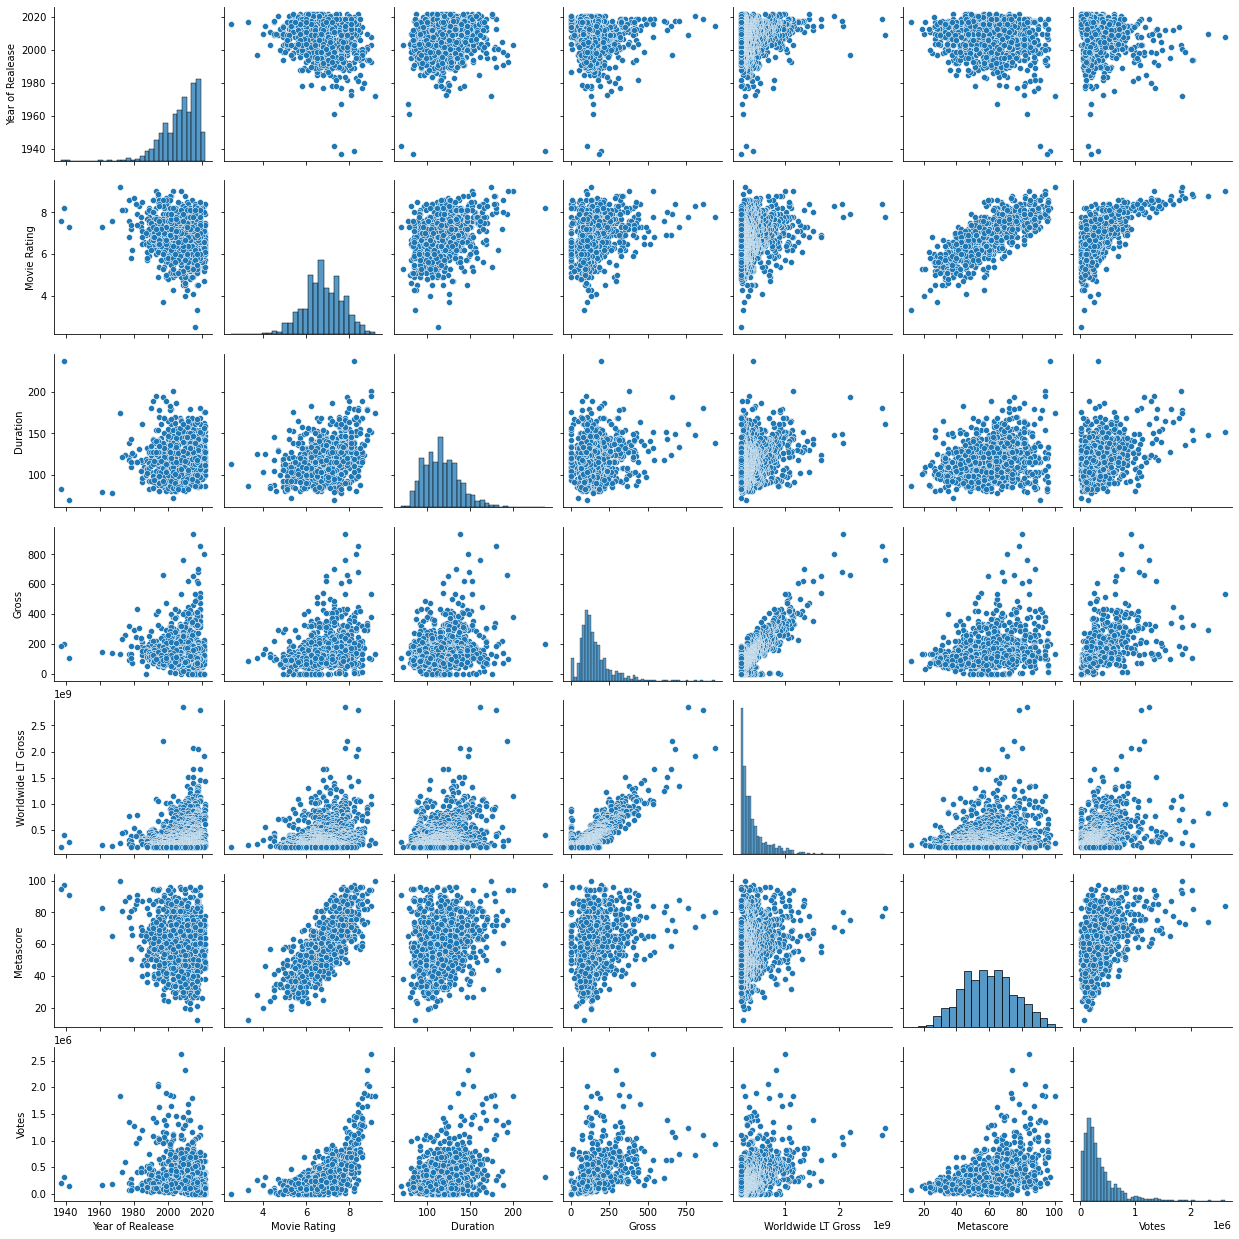

In [94]:
sns.pairplot(df)

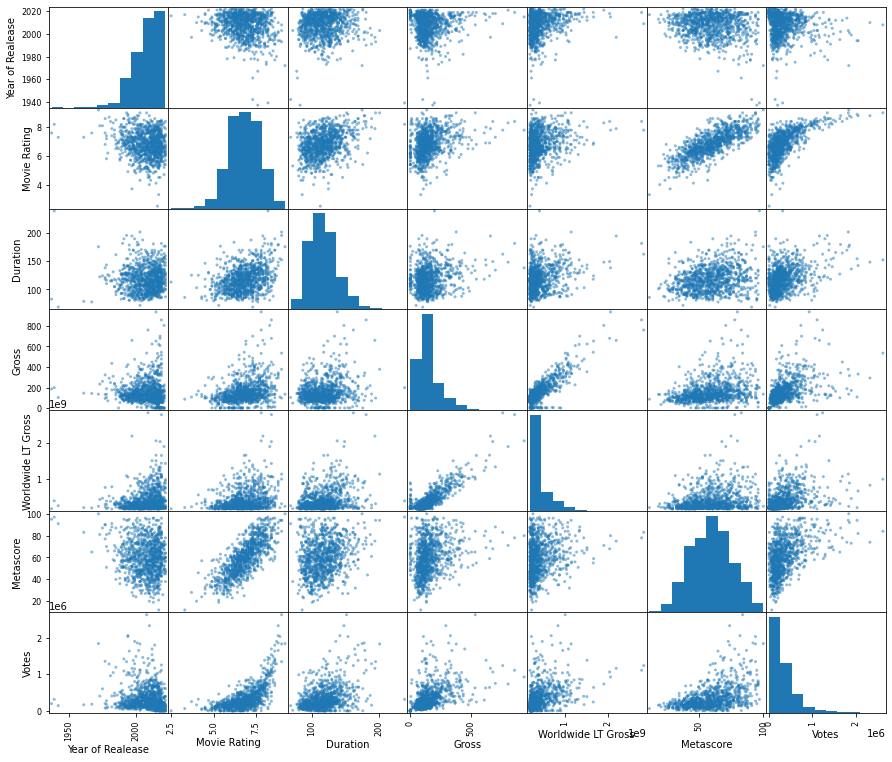

In [412]:
# scatter matrix
from pandas.plotting import scatter_matrix
scatter_matrix(df, figsize = (15, 13))
plt.show()